In [103]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [104]:
import pandas as pd
 
train_dt = pd.read_csv('/kaggle/input/iris/Iris.csv')
train_dt.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
print(train_dt.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [106]:
#'Species_Iris-setosa', 'Species_Iris-versicolor','Species_Iris-virginicark 로 나뉘어지는 코드?
#왜 이렇게 동작하는거지


#Iris = pd.read_csv("/kaggle/input/iris/Iris.csv")

#df = pd.DataFrame(Iris, columns=("Id", "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"))

#Iris = pd.get_dummies(Iris, columns=['Species'])

#print(Iris.columns)

In [107]:
#figure = pd.read('/kaggle/input/iris/')

#/kaggle/input/iris/Iris.csv

#/kaggle/input/iris/

In [108]:
# Iris 데이터셋 파일 경로
iris_path = "/kaggle/input/iris/Iris.csv"  # 또는 다른 파일 이름 (e.g., iris.csv)

# CSV 파일을 Pandas DataFrame으로 읽어오기
iris_df = pd.read_csv(iris_path)

# 데이터 확인
print(iris_df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa




knn은 꽃 종류 맞추는 분류고..

knr 으로 쓴다면
SepalLengthCm 를 입력받아서 SepalWidthCm 를 출력한다?


In [109]:
import numpy as np
import pandas as pd

sepal_length=iris_df['SepalLengthCm']
sepal_length

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64

In [110]:
sepal_width=iris_df['SepalWidthCm']
sepal_width

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64

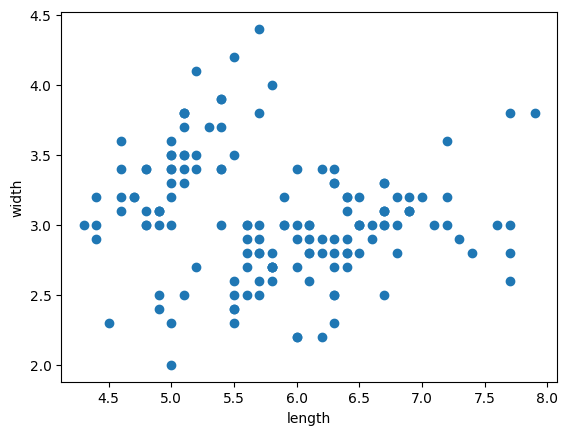

In [111]:
import matplotlib.pyplot as plt
plt.scatter(sepal_length, sepal_width)
plt.xlabel('length')
plt.ylabel('width')
plt.show()

In [112]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(sepal_length, sepal_width, random_state=42)

train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)

from sklearn.neighbors import KNeighborsRegressor
knr=kNeighborsRegressor()

knr.fit(train_input, train_target)
print(knr.score(test_input,test_target))

AttributeError: 'Series' object has no attribute 'reshape'

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np

# Iris 데이터 로드
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")  

# 특징과 타겟 데이터 선택
sepal_length = iris["SepalLengthCm"].values  # NumPy 배열로 변환
sepal_width = iris["SepalWidthCm"].values  # NumPy 배열로 변환

# 데이터 분할
train_input, test_input, train_target, test_target = train_test_split(
    sepal_length.reshape(-1, 1),  # reshape 적용
    sepal_width.reshape(-1, 1),  # reshape 적용
    random_state=42
)

# KNeighborsRegressor 모델 생성
knr = KNeighborsRegressor()

# 모델 학습
knr.fit(train_input, train_target)

# 모델 평가
print(knr.score(test_input, test_target))

-0.19851342674774308


In [114]:
petal_length=iris_df['PetalLengthCm']
petal_length

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64

In [115]:
petal_length = iris["PetalLengthCm"].values  # NumPy 배열로 변환

#2개의 배열 합쳐서 새로운 1개의 큰 배열을 만들고 이 배열로 petal legnth를 예측해보자

#합치기
sepal_length_reshaped=sepal_length.reshape(-1, 1)
sepal_width_reshaped=sepal_width.reshape(-1, 1)
    

#sepal_data=np.column_stack(sepal_length_reshaped,sepal_width_reshaped)처럼 쓰면 오류
sepal_data=np.column_stack((sepal_length_reshaped,sepal_width_reshaped))
sepal_data

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.1],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [116]:
train_input, test_input, train_target, test_target = train_test_split(
    sepal_data,
    petal_length.reshape(-1, 1),  # reshape 적용
    random_state=42
)

# petal_length.reshape(-1, 1) 대신 여기에 또 sepal_lenth 쓰면 어떻게 되는거지? 
#2개로 1개 근데 똑같은걸 예측하는건가? 근데 똑같은거라면 score가 1 나와야하는데 왜 아니지

# KNeighborsRegressor 모델 생성
knr = KNeighborsRegressor()

# 모델 학습
knr.fit(train_input, train_target)

# 모델 평가
print(knr.score(test_input, test_target))

0.9424480378937319


In [117]:
#예측하려는 값
petal_width = iris["PetalWidthCm"].values  # NumPy 배열로 변환


#2개의 배열 합쳐서 새로운 1개의 큰 배열을 만들고 이 배열로 petal legnth를 예측해보자

    

#sepal_data=np.column_stack(sepal_length_reshaped,sepal_width_reshaped)처럼 쓰면 오류
sepal_data=np.column_stack((sepal_data,petal_length))
sepal_data

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [118]:
train_input, test_input, train_target, test_target = train_test_split(
    sepal_data,
    petal_width.reshape(-1, 1),  # reshape 적용
    random_state=42
)

# petal_length.reshape(-1, 1) 대신 여기에 또 sepal_lenth 쓰면 어떻게 되는거지? 
#2개로 1개 근데 똑같은걸 예측하는건가? 근데 똑같은거라면 score가 1 나와야하는데 왜 아니지

# KNeighborsRegressor 모델 생성
knr = KNeighborsRegressor()

# 모델 학습
knr.fit(train_input, train_target)

# 모델 평가
print(knr.score(test_input, test_target))

0.9411666900594897


#예측하려는 값: 꽃 종류



#예측하려는 값
name = iris["Species"].values  # NumPy 배열로 변환
name

In [120]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Iris 데이터 로드
iris = pd.read_csv("/kaggle/input/iris/Iris.csv")

# Species 컬럼을 NumPy 배열로 변환
name = iris["Species"].values

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# Species 값을 숫자로 변환
encoded_name = label_encoder.fit_transform(name)

# 변환된 값 출력
print(encoded_name)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [121]:
sepal_data

array([[5.1, 3.5, 1.4],
       [4.9, 3. , 1.4],
       [4.7, 3.2, 1.3],
       [4.6, 3.1, 1.5],
       [5. , 3.6, 1.4],
       [5.4, 3.9, 1.7],
       [4.6, 3.4, 1.4],
       [5. , 3.4, 1.5],
       [4.4, 2.9, 1.4],
       [4.9, 3.1, 1.5],
       [5.4, 3.7, 1.5],
       [4.8, 3.4, 1.6],
       [4.8, 3. , 1.4],
       [4.3, 3. , 1.1],
       [5.8, 4. , 1.2],
       [5.7, 4.4, 1.5],
       [5.4, 3.9, 1.3],
       [5.1, 3.5, 1.4],
       [5.7, 3.8, 1.7],
       [5.1, 3.8, 1.5],
       [5.4, 3.4, 1.7],
       [5.1, 3.7, 1.5],
       [4.6, 3.6, 1. ],
       [5.1, 3.3, 1.7],
       [4.8, 3.4, 1.9],
       [5. , 3. , 1.6],
       [5. , 3.4, 1.6],
       [5.2, 3.5, 1.5],
       [5.2, 3.4, 1.4],
       [4.7, 3.2, 1.6],
       [4.8, 3.1, 1.6],
       [5.4, 3.4, 1.5],
       [5.2, 4.1, 1.5],
       [5.5, 4.2, 1.4],
       [4.9, 3.1, 1.5],
       [5. , 3.2, 1.2],
       [5.5, 3.5, 1.3],
       [4.9, 3.1, 1.5],
       [4.4, 3. , 1.3],
       [5.1, 3.4, 1.5],
       [5. , 3.5, 1.3],
       [4.5, 2.3

In [122]:
sepal_data=np.column_stack((sepal_data,petal_width))
sepal_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [137]:
train_input, test_input, train_target, test_target = train_test_split(
    sepal_data,
    encoded_name.reshape(-1, 1),  # reshape 적용
    random_state=42
)



# KNeighborsRegressor 모델 생성
knr = KNeighborsRegressor()

# 모델 학습
knr.fit(train_input, train_target)

# 모델 평가
print(knr.score(test_input, test_target))

0.9835594886922321


In [138]:
knr.score(train_input, train_target)

0.9588588220888943

In [131]:
mean=np.mean(train_input, axis=0)
std=np.std(train_input, axis=0)

train_scaled=(train_input-mean)/std
test_scaled=(test_input-mean)/std

knr.fit(train_scaled, train_target)
knr.score(test_scaled, test_target)

0.9865486725663717

In [136]:
knr.score(train_scaled, train_target)

-1.577631933390474